In [12]:
__author__ = "Munir Makani"

## Financial Planning
# Answers

In [13]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [14]:
# next load .env enviroment variables
load_dotenv()

True

In [15]:
# Crypto Portfolio 

# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [16]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [17]:
# Fetch current BTC price
btc_price = requests.get(btc_url)

# Fetch current ETH price
eth_price = requests.get(eth_url)

In [18]:
# Extract response / Retrieve output for BTC & ETH in order to get names of rows
btc_response = btc_price.content
eth_response = eth_price.content

# Convert output to JSON
btc_data = btc_price.json()
eth_data = eth_price.json()

In [19]:
# Fetch prices of both BTC and ETH in order to compute total value of crypto portfolio
btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
btc_value = my_btc * btc_price
eth_value = my_eth * eth_price


# Print portfolio value of crypto currencies
print(f"The current value of {my_btc} BTC in the crypto portfolio is ${btc_value:0,.2f}")
print(f"The current value of {my_eth} ETH in the crypto portfolio is ${eth_value:0,.2f}")


The current value of 1.2 BTC in the crypto portfolio is $38,617.20
The current value of 5.3 ETH in the crypto portfolio is $6,466.74


In [20]:
# stocks and Bond Portfolio 

# Using Alpaca to get SPY (stocks) and AGG (bonds) prices

# First set no of shares for stocks and bonds 
my_spy = 50
my_agg = 200

In [21]:
# Then set Alpaca API key and secret key

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [22]:
# Format current date as ISO format
today = pd.Timestamp("2021-1-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG and create stock/bond portfolio
sb_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
sb_portfolio.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.26  5801029  384.49   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-21 00:00:00-05:00  384.95  383.25  384.2  41800991

In [23]:
# Pick AGG and SPY close prices
agg_close = sb_portfolio["AGG"]["close"].item()
spy_close = sb_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $117.26
Current SPY closing price: $384.2


In [24]:
# Compute the value in dollars of the current amount of shares and print the results
spy_value = my_spy * spy_close
agg_value = my_agg * agg_close

# Print portfolio value of stocks and bonds
print(f"The current value of {my_spy} SPY shares in the portfolio is ${spy_value:0,.2f}")
print(f"The current value of {my_agg} AGG shares in the portfolio is ${agg_value:0,.2f}")


The current value of 50 SPY shares in the portfolio is $19,210.00
The current value of 200 AGG shares in the portfolio is $23,452.00


In [25]:
# Savings Health Analysis

# Set monthly household income
monthly_income = 12000

In [26]:
# Dictionary that holds the value of BTC, ETH, SPY and AGG 
portfolio_dict = {'Amount': [btc_value+eth_value, spy_value+agg_value]}

# Dataframe df_savings

df_savings = pd.DataFrame(portfolio_dict, index=['Crypto','Shares'])

df_savings

,Amount
Crypto,45083.942
Shares,42662.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

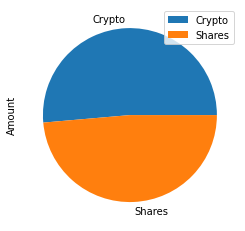

In [30]:
# Plot savings pie chart

df_savings.plot(kind='pie', subplots=True)

In [31]:
# Emergency fund for three months
emergency_fund = monthly_income * 3

In [32]:
# Calculate total savings
total_savings = df_savings.sum().item()
total_savings

87745.942

In [33]:
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! Your saving portfolio covers more than 100% of your emergency fund requirement")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your goal of saving portfolio to 100% cover your emergency fund requirement")
else:
    print(f'Caution: You are still ${emergency_fund - total_savings} away from reaching your goal your saving portfolio covering 100% of your emergency fund requirement.')

Congratulations! Your saving portfolio covers more than 100% of your emergency fund requirement


In [34]:
# Retirement Planning

# Set start and end dates of five years back from today

start_date = pd.Timestamp('2016-01-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-01-19', tz='America/New_York').isoformat()

In [35]:
# Last 5 years of historical data for SPY and AGG
df_shares = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_shares.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197.0   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040.0   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926.0   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-19 00:00:00-05:00  189.96  190.11  186.20  188.02  151482568  
2016-01-20 00:00:00-05:00  185.03  188.06  181.02  185.79  245668486  
2016-01-21 00:00:00-05:00  186.21  188.87  184.64  186.68  154918462  
2016-01-22 00:00:00-05:00  189.78  190.76  188.88  190.49  132418951  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_years_returns = MCSimulation(
    portfolio_data = df_shares,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)
thirty_years_returns.portfolio_data.head()


AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197.0   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040.0   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926.0   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-19 00:00:00-05:00          NaN  189.96  190.11  186.20  188.02   
2016-01-20 00:00:00-05:00     0.001011  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   

                                                   
                              volume daily_return  
time                                               
2016-01-19 00:00:00-05:00  151482568          NaN  
2016-01-20 00:00:00-05:00  245668486    -0.011860  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856

In [37]:
# Monte Carlo simulation to forecast 30 years cumulative returns
thirty_years_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001801,1.002622,1.004847,0.996915,1.006852,1.004897,0.998565,1.002182,0.999395,0.998299,...,1.000579,1.006527,0.999573,1.000160,1.002936,1.005292,1.003082,0.999020,1.005587,1.002697
2,0.997721,1.008367,0.997135,0.995276,1.005155,1.001454,1.001460,1.003622,1.000073,1.006499,...,1.003537,1.008498,1.006446,1.005412,1.007363,1.006096,0.998848,0.999229,1.003888,1.001240
3,0.998374,1.004474,1.005508,0.998838,1.001666,0.998626,0.997077,1.015865,1.005679,0.999459,...,1.003428,1.009352,0.999145,1.012124,1.009753,1.003143,0.994690,0.994709,1.002880,0.998017
4,1.002505,1.004421,1.004615,1.000656,1.001169,1.000449,0.997055,1.016379,1.007124,0.995122,...,1.002648,1.008597,0.997545,1.019046,1.004739,1.001537,0.998209,1.001749,1.009383,0.999410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.323784,10.141794,32.961182,26.524823,18.658517,8.300238,13.831578,23.326052,16.366516,11.224584,...,16.209316,17.289823,19.256181,14.955045,16.799524,10.223240,14.597643,11.612648,14.747518,19.592997
7557,13.332725,10.075502,32.938810,26.794026,18.798558,8.288375,13.974511,23.438521,16.326300,11.112334,...,16.250532,17.397523,19.307617,14.891372,16.723740,10.260479,14.677734,11.603363,14.831943,19.513578
7558,13.400700,10.163459,32.866237,26.798394,18.841531,8.282162,13.853677,23.293966,16.278557,10.985524,...,16.413146,17.456511,19.320882,14.902369,16.713534,10.316040,14.708273,11.720709,14.880793,19.555007
7559,13.425456,10.162142,32.932103,26.852380,18.933420,8.293806,13.806498,23.343318,16.373889,10.987382,...,16.385783,17.455034,19.199251,14.917673,16.721072,10.240336,14.685491,11.717122,14.761745,19.528908


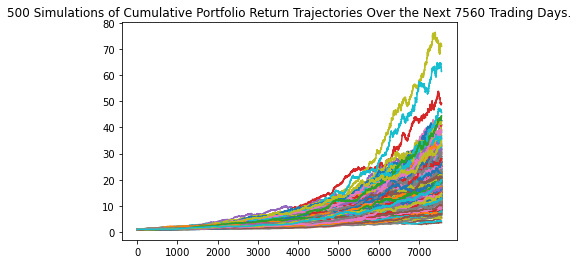

In [38]:
# Ploting of simulation outcomes
simmulation_plot = thirty_years_returns.plot_simulation()

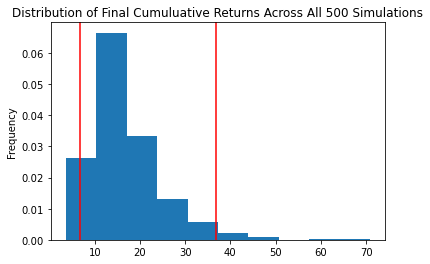

In [39]:
# Plotting of probability distribution and confidence intervals
distribution_plot = thirty_years_returns.plot_distribution()

In [40]:
# Summary statistics from the Monte Carlo simulation results
simmulation_summary = thirty_years_returns.summarize_cumulative_return()

# Print summary statistics
print(simmulation_summary)

count           500.000000
mean             16.713566
std               8.085038
min               3.589063
25%              11.315663
50%              14.785780
75%              20.444942
max              70.899922
95% CI Lower      6.777700
95% CI Upper     36.863588
Name: 7560, dtype: float64


In [41]:
# Initial investment
initial_investment = 20000

# Upper and Lower `95%` confidence intervals to calculate the range of the possible outcomes of $20,000 initial investment

ci_lower = round(simmulation_summary[8]*initial_investment,2)
ci_upper = round(simmulation_summary[9]*initial_investment,2)

In [42]:
# Print intial investment results
print(f"Commentry: There is around 95% chance that an initial investment of ${initial_investment:0,.2f} in the shares portfolio over the next thirty years could fall within range of ${ci_lower:0,.2f} and ${ci_upper:0,.2f} ")      

Commentry: There is around 95% chance that an initial investment of $20,000.00 in the shares portfolio over the next thirty years could fall within range of $135,554.01 and $737,271.76 


In [43]:
# Revised investment
revised_investment = initial_investment * 1.5

In [44]:
# Upper and Lower `95%` confidence intervals to calculate the range of the possible outcomes of $30,000 revised investment

ci_lower = round(simmulation_summary[8]*revised_investment,2)
ci_upper = round(simmulation_summary[9]*revised_investment,2)

In [45]:
# Print revised investment results
print(f"Commentry: There is around 95% chance that a revised investment of ${revised_investment:0,.2f} in the shares portfolio over the next thirty years could fall within range of ${ci_lower:0,.2f} and ${ci_upper:0,.2f} ")      

Commentry: There is around 95% chance that a revised investment of $30,000.00 in the shares portfolio over the next thirty years could fall within range of $203,331.01 and $1,105,907.64 


In [46]:
# Challange
# Early retirement investment plan
er_investment = initial_investment * 10
er_investment 

200000

In [47]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
five_years_returns = MCSimulation(
    portfolio_data = df_shares,
    weights = [0.25,0.75],
    num_simulation = 300,
    num_trading_days = 252*5
)
five_years_returns.portfolio_data.head()


AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197.0   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040.0   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926.0   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-19 00:00:00-05:00          NaN  189.96  190.11  186.20  188.02   
2016-01-20 00:00:00-05:00     0.001011  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   

                                                   
                              volume daily_return  
time                                               
2016-01-19 00:00:00-05:00  151482568          NaN  
2016-01-20 00:00:00-05:00  245668486    -0.011860  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856

In [48]:
# Monte Carlo simulation to forecast 5 years cumulative returns
five_years_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007836,0.995902,1.009166,1.003626,0.994667,1.010321,1.000540,0.998090,1.004033,1.004276,...,1.001945,1.002472,0.999860,1.011884,0.993177,1.000550,1.000556,0.998254,1.017444,1.004288
2,1.011814,0.993238,1.012670,0.997161,0.991039,1.010764,1.001800,0.993790,1.000804,1.001919,...,1.003854,0.991949,1.000199,1.004108,0.995228,1.000132,1.004829,1.000360,1.021078,1.011833
3,1.008099,1.001163,1.013012,0.987127,0.992974,1.020258,0.995813,0.996847,0.998245,0.995546,...,0.993386,0.997602,0.994872,1.011094,0.996733,1.007052,1.001281,0.996904,1.019373,1.008276
4,0.998390,0.998372,1.022602,0.999205,0.996885,1.030115,1.000604,0.998281,0.998546,0.992532,...,0.997383,1.003893,0.994957,0.998144,0.999059,1.016067,1.008638,1.002332,1.018182,1.010812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.799819,1.500104,1.729074,1.725660,1.678468,2.100189,2.705641,1.309632,1.326305,2.301347,...,1.897593,1.748764,1.104815,1.248589,1.704893,1.958429,3.174355,1.903593,2.368473,1.391873
1257,1.804432,1.490886,1.728512,1.732974,1.677962,2.094779,2.708993,1.317515,1.339185,2.328853,...,1.906237,1.739030,1.099481,1.251546,1.715736,1.952212,3.169738,1.899706,2.362575,1.401940
1258,1.809692,1.497747,1.734171,1.724966,1.683429,2.106963,2.681497,1.321202,1.342968,2.311506,...,1.908084,1.743815,1.099419,1.250390,1.713083,1.956625,3.198155,1.903217,2.368715,1.407100
1259,1.807891,1.501798,1.741479,1.749910,1.702744,2.099577,2.666933,1.319368,1.344053,2.304519,...,1.911570,1.739142,1.093120,1.260786,1.731433,1.978495,3.189163,1.904318,2.353655,1.419587


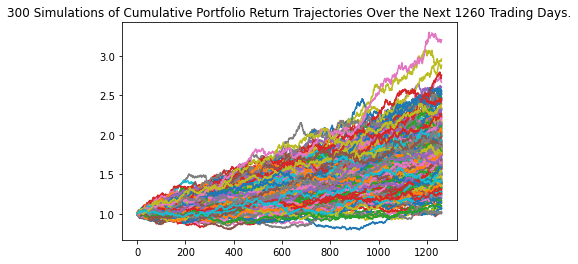

In [49]:
# Ploting of simulation outcomes
er_simmulation_plot = five_years_returns.plot_simulation()

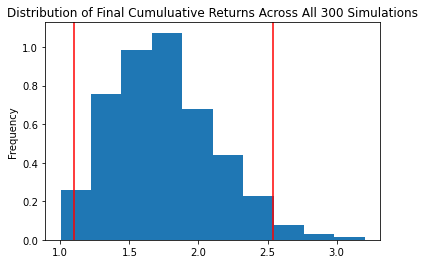

In [50]:
# Plotting of probability distribution and confidence intervals
er_distribution_plot = five_years_returns.plot_distribution()

In [51]:
# Summary statistics from the Monte Carlo simulation results
er_simmulation_summary = five_years_returns.summarize_cumulative_return()
er_simmulation_summary

count           300.000000
mean              1.753243
std               0.374746
min               1.001528
25%               1.493829
50%               1.739363
75%               1.984227
max               3.204568
95% CI Lower      1.095892
95% CI Upper      2.538791
Name: 1260, dtype: float64

In [52]:
# Upper and Lower `95%` confidence intervals to calculate the range of the possible outcomes of $200,000 to be put initially for an early retirement investment plan 

er_ci_lower = round(er_simmulation_summary[8]*er_investment,2)
er_ci_upper = round(er_simmulation_summary[9]*er_investment,2)

In [53]:
# Print early retirement investment results
print(f"Commentry: For early rinvestment, with an initial investment of ${er_investment:0,.2f} with asset allocation of 75% in SPY and 25% in AGG over 5 years investment horizon, the portfolio over the next five years could fall with range of ${er_ci_lower:0,.2f} and ${er_ci_upper:0,.2f}") 

Commentry: For early rinvestment, with an initial investment of $200,000.00 with asset allocation of 75% in SPY and 25% in AGG over 5 years investment horizon, the portfolio over the next five years could fall with range of $219,178.34 and $507,758.20
